# Project 2: Recommenders using Collaborative Filtering

## Environment setup

## 1.1 Problem definition

## 2.1 Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from matplotlib.pyplot import figure
from surprise import Dataset
from surprise.model_selection import cross_validate
from surprise import Reader, Dataset, SVD
from surprise import BaselineOnly
from surprise import Reader
from surprise import accuracy
from surprise import Trainset
from surprise.model_selection import train_test_split
from surprise.model_selection import GridSearchCV
from collections import defaultdict

## 2.2 Data Loading

In [2]:
columns_name=['user_id','item_id','rating','timestamp']
user=pd.read_csv('/Users/nizammohammad/.surprise_data/ml-100k/ml-100k/u.data',sep="\t",names=columns_name)        
#u.data is a tsv file (tab separated values)
print(user.head())
user.shape

   user_id  item_id  rating  timestamp
0      196      242       3  881250949
1      186      302       3  891717742
2       22      377       1  878887116
3      244       51       2  880606923
4      166      346       1  886397596


(100000, 4)

In [3]:
movies_data=pd.read_csv('/Users/nizammohammad/.surprise_data/ml-100k/ml-100k/u.item',sep="\|",header= None)
movies_data.shape

<ipython-input-3-bee343609e4b>:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  movies_data=pd.read_csv('/Users/nizammohammad/.surprise_data/ml-100k/ml-100k/u.item',sep="\|",header= None)


(1682, 24)

## 3.1 Exploratory Data Analysis

In [4]:
movies_data.head()

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


There are 24 bitwise columns in movies_data

In [5]:
movies=movies_data
movies.head()

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [6]:
movies.columns=['item_id', 'movie_title', 'release_date' , 'video_release_date',
              'IMDb_URL','unknown','Action','Adventure','Animation',
              'Childrens','Comedy','Crime','Documentary','Drama','Fantasy',
              'Film_Noir' ,'Horror' ,'Musical', 'Mystery', 'Romance' , 'Sci-Fi',
              'Thriller' , 'War' , 'Western'] 
movies.head(5)

,item_id,movie_title,release_date,video_release_date,IMDb_URL,unknown,Action,Adventure,Animation,Childrens,...,Fantasy,Film_Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [7]:
user.head()

,user_id,item_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [8]:
user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype
---  ------     --------------   -----
 0   user_id    100000 non-null  int64
 1   item_id    100000 non-null  int64
 2   rating     100000 non-null  int64
 3   timestamp  100000 non-null  int64
dtypes: int64(4)
memory usage: 3.1 MB


Check for missing values

In [9]:
user.isna().sum()

user_id      0
item_id      0
rating       0
timestamp    0
dtype: int64

Merging user and movie dataframes

In [10]:
df=pd.merge(user,movies,on="item_id")

In [11]:
df.head()

,user_id,item_id,rating,timestamp,movie_title,release_date,video_release_date,IMDb_URL,unknown,Action,...,Fantasy,Film_Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,196,242,3,881250949,Kolya (1996),24-Jan-1997,NaN,http://us.imdb.com/M/title-exact?Kolya%20(1996),0,0,...,0,0,0,0,0,0,0,0,0,0
1,63,242,3,875747190,Kolya (1996),24-Jan-1997,NaN,http://us.imdb.com/M/title-exact?Kolya%20(1996),0,0,...,0,0,0,0,0,0,0,0,0,0
2,226,242,5,883888671,Kolya (1996),24-Jan-1997,NaN,http://us.imdb.com/M/title-exact?Kolya%20(1996),0,0,...,0,0,0,0,0,0,0,0,0,0
3,154,242,3,879138235,Kolya (1996),24-Jan-1997,NaN,http://us.imdb.com/M/title-exact?Kolya%20(1996),0,0,...,0,0,0,0,0,0,0,0,0,0
4,306,242,5,876503793,Kolya (1996),24-Jan-1997,NaN,http://us.imdb.com/M/title-exact?Kolya%20(1996),0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
df.isna().sum()

user_id                    0
item_id                    0
rating                     0
timestamp                  0
movie_title                0
release_date               9
video_release_date    100000
IMDb_URL                  13
unknown                    0
Action                     0
Adventure                  0
Animation                  0
Childrens                  0
Comedy                     0
Crime                      0
Documentary                0
Drama                      0
Fantasy                    0
Film_Noir                  0
Horror                     0
Musical                    0
Mystery                    0
Romance                    0
Sci-Fi                     0
Thriller                   0
War                        0
Western                    0
dtype: int64

## 4.1 Machine Learning

### 4.1.1 Hyperparameter tuning

The matrix factorization algorithm(SVD) work by decomposing the user-item interaction matrix into the product of two lower dimensionality rectangular matrices.The minimization is performed by a very straightforward stochastic gradient descent:

In [13]:
from surprise import SVD
from surprise import Dataset
from surprise import accuracy
from surprise.model_selection import train_test_split

In [14]:
# Load the movielens-100k dataset (download it if needed),
data = Dataset.load_builtin('ml-100k')

# sample random trainset and testset
# test set is made of 25% of the ratings.
trainset, testset = train_test_split(data, test_size=.25)

In [15]:
param_grid = {'n_epochs': [5, 10, 20], 'lr_all': [0.002, 0.005],
              'reg_all': [0.02, 0.04, 0.06]}

gs = GridSearchCV(SVD, param_grid, measures=['rmse', 'mae'], cv=5)
gs.fit(data)

# best RMSE score
print(gs.best_score['rmse'])
# combination of parameters that gave the best RMSE score
print(gs.best_params['rmse'])

0.9315698233055343
{'n_epochs': 20, 'lr_all': 0.005, 'reg_all': 0.04}


### 4.1.2 Model Train

In [16]:
# We can now use the algorithm that yields the best rmse:
algo = gs.best_estimator['rmse']
# algo.fit(trainset)
algo.fit(data.build_full_trainset())

In [17]:
gs.best_estimator['rmse']

### 4.1.3 Predict

In [18]:
def get_top_n(predictions, n=10):
    """Return the top-N recommendation for each user from a set of predictions.

    Args:
        predictions(list of Prediction objects): The list of predictions, as
            returned by the test method of an algorithm.
        n(int): The number of recommendation to output for each user. Default
            is 10.

    Returns:
    A dict where keys are user (raw) ids and values are lists of tuples:
        [(raw item id, rating estimation), ...] of size n.
    """

    # First map the predictions to each user.
    top_n = defaultdict(list)
    for uid, iid, true_r, est, _ in predictions:
        top_n[uid].append((iid, est))

    # Then sort the predictions for each user and retrieve the k highest ones.
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_n[uid] = user_ratings[:n]

    return top_n

In [19]:
def get_predictions_for_each_user(predictions):
    """Return the recommendation for each user from a set of predictions.

    Args:
        predictions(list of Prediction objects): The list of predictions, as
            returned by the test method of an algorithm.

    Returns:
    A dict where keys are user (raw) ids and values are lists of tuples:
        [(raw item id, rating estimation), ...] of size n.
    """

    # First map the predictions to each user.
    top_n = defaultdict(list)
    for uid, iid, true_r, est, _ in predictions:
        top_n[uid].append((iid, est))

    return top_n

In [20]:
# predict ratings for all pairs (u, i) that are NOT in the training set.
predictions = algo.test(trainset.build_anti_testset())

top_n = get_top_n(predictions, n=10)

In [21]:
print("UserId  List of top 10 movie recommendations and expected rating \n")

for uid, user_ratings in top_n.items():
#     print(uid, [iid for (iid, _) in user_ratings])
      print(uid,"\t", [(iid,_) for (iid, _) in user_ratings],"\n")

UserId  List of top 10 movie recommendations and expected rating 

119 	 [('318', 5), ('98', 4.863414586793833), ('963', 4.822477525519756), ('169', 4.779937855259655), ('513', 4.776833030297101), ('483', 4.767433505312636), ('408', 4.7493108179695405), ('114', 4.736794769635425), ('357', 4.706020382950847), ('191', 4.69928407349992)] 

297 	 [('12', 4.304503163104716), ('318', 4.299930011701676), ('408', 4.211263419044602), ('480', 4.194412561235997), ('169', 4.176535679331398), ('483', 4.17158031116034), ('515', 4.16449956594535), ('136', 4.150944556410472), ('64', 4.144586415025763), ('313', 4.141368457407669)] 

716 	 [('50', 4.820472592967361), ('357', 4.7019054000945015), ('174', 4.687281553501982), ('498', 4.612309196170832), ('480', 4.5896995857068354), ('169', 4.584559404368279), ('408', 4.571937477844163), ('170', 4.538493732149527), ('114', 4.53507792704912), ('302', 4.525510756430113)] 

488 	 [('272', 4.124042725113839), ('408', 4.015661246229977), ('169', 3.96679281325730

## 5.1 Results

List of top 10 movie recommendation with corresponding rating for userId==196

In [22]:
# USER_ID=793
USER_ID=511

In [23]:
print("UserId ItemId  List of top 10 movie recommendation with corresponding rating\n")

for uid, user_ratings in top_n.items():
#     print(uid, [iid for (iid, _) in user_ratings])
    if int(uid) == USER_ID:
        for (iid, _) in user_ratings:
            
            df_test3= df[df['item_id'] == int(iid)]
        
            print(uid,"\t",iid,"\t", df_test3['movie_title'].iloc[0] ,"\t\t",_,"\n")

UserId ItemId  List of top 10 movie recommendation with corresponding rating

511 	 318 	 Schindler's List (1993) 		 5 

511 	 64 	 Shawshank Redemption, The (1994) 		 5 

511 	 169 	 Wrong Trousers, The (1993) 		 5 

511 	 408 	 Close Shave, A (1995) 		 4.986696949174473 

511 	 483 	 Casablanca (1942) 		 4.928514467332068 

511 	 657 	 Manchurian Candidate, The (1962) 		 4.9132063819129685 

511 	 357 	 One Flew Over the Cuckoo's Nest (1975) 		 4.894370923543098 

511 	 603 	 Rear Window (1954) 		 4.890267278108459 

511 	 178 	 12 Angry Men (1957) 		 4.88807324388532 

511 	 515 	 Boot, Das (1981) 		 4.886991237729622 



In [24]:
for uid, user_ratings in top_n.items():
     if int(uid)==USER_ID:
        print(uid, [iid for (iid, _) in user_ratings])

511 ['318', '64', '169', '408', '483', '657', '357', '603', '178', '515']


## 6.1 Discussion

### 6.1.1 Validating the recommendation generated

In [25]:
ITEM_ID=318

In [26]:
df_test1 = df[df['item_id'] == ITEM_ID]
df_test1.head(1)

,user_id,item_id,rating,timestamp,movie_title,release_date,video_release_date,IMDb_URL,unknown,Action,...,Fantasy,Film_Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
31134,200,318,5,884128458,Schindler's List (1993),01-Jan-1993,NaN,http://us.imdb.com/M/title-exact?Schindler's%2...,0,0,...,0,0,0,0,0,0,0,0,1,0


In [27]:
df_test1.head()

,user_id,item_id,rating,timestamp,movie_title,release_date,video_release_date,IMDb_URL,unknown,Action,...,Fantasy,Film_Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
31134,200,318,5,884128458,Schindler's List (1993),01-Jan-1993,NaN,http://us.imdb.com/M/title-exact?Schindler's%2...,0,0,...,0,0,0,0,0,0,0,0,1,0
31135,234,318,4,892078890,Schindler's List (1993),01-Jan-1993,NaN,http://us.imdb.com/M/title-exact?Schindler's%2...,0,0,...,0,0,0,0,0,0,0,0,1,0
31136,207,318,5,877124871,Schindler's List (1993),01-Jan-1993,NaN,http://us.imdb.com/M/title-exact?Schindler's%2...,0,0,...,0,0,0,0,0,0,0,0,1,0
31137,161,318,3,891170824,Schindler's List (1993),01-Jan-1993,NaN,http://us.imdb.com/M/title-exact?Schindler's%2...,0,0,...,0,0,0,0,0,0,0,0,1,0
31138,125,318,5,879454309,Schindler's List (1993),01-Jan-1993,NaN,http://us.imdb.com/M/title-exact?Schindler's%2...,0,0,...,0,0,0,0,0,0,0,0,1,0


In [28]:
df.loc[df['user_id'] == USER_ID,'Drama'].sum()

8

In [29]:
#Understanding the interests of User 198
df.dtypes

user_id                 int64
item_id                 int64
rating                  int64
timestamp               int64
movie_title            object
release_date           object
video_release_date    float64
IMDb_URL               object
unknown                 int64
Action                  int64
Adventure               int64
Animation               int64
Childrens               int64
Comedy                  int64
Crime                   int64
Documentary             int64
Drama                   int64
Fantasy                 int64
Film_Noir               int64
Horror                  int64
Musical                 int64
Mystery                 int64
Romance                 int64
Sci-Fi                  int64
Thriller                int64
War                     int64
Western                 int64
dtype: object

In [30]:
genre=['unknown','Action','Adventure','Animation','Childrens','Comedy','Crime','Documentary','Drama','Fantasy','Film_Noir','Horror','Musical','Mystery','Romance','Sci-Fi','Thriller','War','Western']

In [31]:
df_test2=df.loc[df['user_id'] == USER_ID]

In [32]:
df_test2.shape

(24, 27)

In [33]:
genre_5_star={}
genre_4_star={}
df_test3=df_test2
for i in genre:
    genre_5_star[i]=df_test3.loc[df_test3['rating'] == 5,i].sum()
    genre_4_star[i]=df_test3.loc[df_test3['rating'] == 4,i].sum()

In [34]:
# preferences_for_gievn_user = dict(sorted(preferences_for_gievn_user.items(), key=lambda item: item[1],reverse=True))
print(genre_5_star)
print(genre_4_star)

{'unknown': 0, 'Action': 2, 'Adventure': 1, 'Animation': 0, 'Childrens': 0, 'Comedy': 0, 'Crime': 0, 'Documentary': 0, 'Drama': 4, 'Fantasy': 0, 'Film_Noir': 0, 'Horror': 0, 'Musical': 0, 'Mystery': 0, 'Romance': 2, 'Sci-Fi': 1, 'Thriller': 0, 'War': 1, 'Western': 0}
{'unknown': 0, 'Action': 2, 'Adventure': 0, 'Animation': 0, 'Childrens': 0, 'Comedy': 3, 'Crime': 1, 'Documentary': 0, 'Drama': 2, 'Fantasy': 0, 'Film_Noir': 0, 'Horror': 3, 'Musical': 0, 'Mystery': 3, 'Romance': 0, 'Sci-Fi': 1, 'Thriller': 6, 'War': 0, 'Western': 0}


## 6.1.1 Drawing inference from Graphs

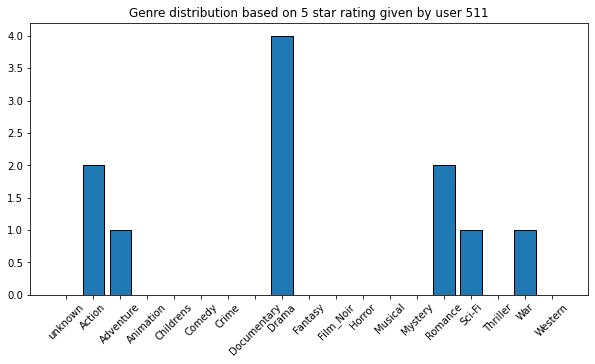

In [105]:
plt.bar(range(len(genre_5_star)), list(genre_5_star.values()), align='center')
plt.xticks(range(len(genre_5_star)), list(genre_5_star.keys()))
plt.xticks(rotation = 45) 

plt.title(f'Genre distribution based on 5 star rating given by user {USER_ID}')
plt.rcParams["figure.figsize"] = (10,5)

plt.show()

Figure 1.1

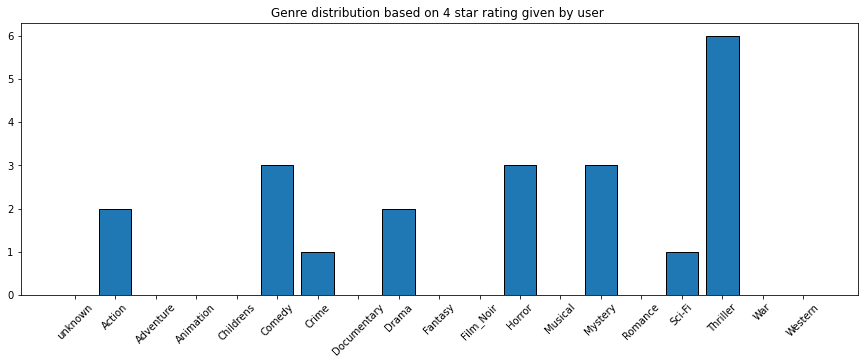

In [104]:
plt.bar(range(len(genre_4_star)), list(genre_4_star.values()), align='center')
plt.xticks(range(len(genre_4_star)), list(genre_4_star.keys()))
plt.xticks(rotation = 45) 

plt.title(f'Genre distribution based on 4 star rating given by user ')
plt.rcParams["figure.figsize"] = (10,5)

plt.show()

Figure 1.2

In [37]:
print("User Id Movie Id \t Movie Title \t\t Predicted rating from user \n")

for uid, user_ratings in top_n.items():
#     print(uid, [iid for (iid, _) in user_ratings])
    for (iid, _) in user_ratings:
#         print(iid)
        df_test3= df[df['item_id'] == int(iid)]
        if int(uid) == USER_ID:        
            print(uid,"\t",iid,"\t", df_test3['movie_title'].iloc[0] ,"\t\t",_,"\n")

User Id Movie Id 	 Movie Title 		 Predicted rating from user 

511 	 318 	 Schindler's List (1993) 		 5 

511 	 64 	 Shawshank Redemption, The (1994) 		 5 

511 	 169 	 Wrong Trousers, The (1993) 		 5 

511 	 408 	 Close Shave, A (1995) 		 4.986696949174473 

511 	 483 	 Casablanca (1942) 		 4.928514467332068 

511 	 657 	 Manchurian Candidate, The (1962) 		 4.9132063819129685 

511 	 357 	 One Flew Over the Cuckoo's Nest (1975) 		 4.894370923543098 

511 	 603 	 Rear Window (1954) 		 4.890267278108459 

511 	 178 	 12 Angry Men (1957) 		 4.88807324388532 

511 	 515 	 Boot, Das (1981) 		 4.886991237729622 



In [38]:
df[df['item_id'] == ITEM_ID]

,user_id,item_id,rating,timestamp,movie_title,release_date,video_release_date,IMDb_URL,unknown,Action,...,Fantasy,Film_Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
31134,200,318,5,884128458,Schindler's List (1993),01-Jan-1993,NaN,http://us.imdb.com/M/title-exact?Schindler's%2...,0,0,...,0,0,0,0,0,0,0,0,1,0
31135,234,318,4,892078890,Schindler's List (1993),01-Jan-1993,NaN,http://us.imdb.com/M/title-exact?Schindler's%2...,0,0,...,0,0,0,0,0,0,0,0,1,0
31136,207,318,5,877124871,Schindler's List (1993),01-Jan-1993,NaN,http://us.imdb.com/M/title-exact?Schindler's%2...,0,0,...,0,0,0,0,0,0,0,0,1,0
31137,161,318,3,891170824,Schindler's List (1993),01-Jan-1993,NaN,http://us.imdb.com/M/title-exact?Schindler's%2...,0,0,...,0,0,0,0,0,0,0,0,1,0
31138,125,318,5,879454309,Schindler's List (1993),01-Jan-1993,NaN,http://us.imdb.com/M/title-exact?Schindler's%2...,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31427,908,318,5,879722717,Schindler's List (1993),01-Jan-1993,NaN,http://us.imdb.com/M/title-exact?Schindler's%2...,0,0,...,0,0,0,0,0,0,0,0,1,0
31428,846,318,5,883947777,Schindler's List (1993),01-Jan-1993,NaN,http://us.imdb.com/M/title-exact?Schindler's%2...,0,0,...,0,0,0,0,0,0,0,0,1,0
31429,524,318,4,884635287,Schindler's List (1993),01-Jan-1993,NaN,http://us.imdb.com/M/title-exact?Schindler's%2...,0,0,...,0,0,0,0,0,0,0,0,1,0
31430,913,318,4,880794731,Schindler's List (1993),01-Jan-1993,NaN,http://us.imdb.com/M/title-exact?Schindler's%2...,0,0,...,0,0,0,0,0,0,0,0,1,0


In [39]:
movie_type={}
for i in genre:
    movie_type[i]=df.loc[df['item_id'] == ITEM_ID,i].sum()

In [40]:
print(movie_type)

{'unknown': 0, 'Action': 0, 'Adventure': 0, 'Animation': 0, 'Childrens': 0, 'Comedy': 0, 'Crime': 0, 'Documentary': 0, 'Drama': 298, 'Fantasy': 0, 'Film_Noir': 0, 'Horror': 0, 'Musical': 0, 'Mystery': 0, 'Romance': 0, 'Sci-Fi': 0, 'Thriller': 0, 'War': 298, 'Western': 0}


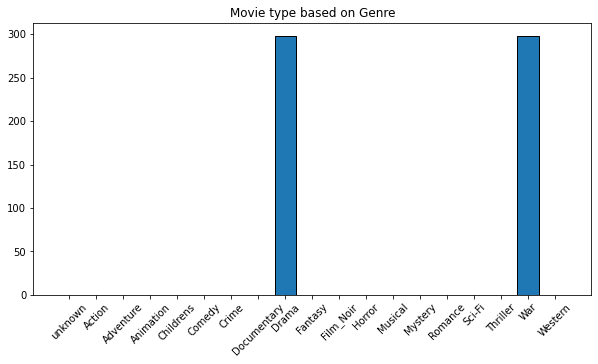

In [106]:
plt.bar(range(len(movie_type)), list(movie_type.values()), align='center')
plt.xticks(range(len(movie_type)), list(movie_type.keys()))
plt.xticks(rotation = 45) 

plt.title('Movie type based on Genre')
plt.rcParams["figure.figsize"] = (5,5)

plt.show()

Figure 1.3

## Post Review changes

Review points:
    Consider mean of ratings rather than cummulative sum per genre
    Plot Histogram with movie distribution across each category

In [42]:
genre_5_star_avg={}
genre_4_star_avg={}
df_test3=df_test2
for i in genre:
    genre_5_star_avg[i]=df_test3.loc[df_test3['rating'] == 5,i].mean()
    genre_4_star_avg[i]=df_test3.loc[df_test3['rating'] == 4,i].mean()

In [43]:
print(genre_5_star_avg)
print(genre_4_star_avg)

{'unknown': 0.0, 'Action': 0.3333333333333333, 'Adventure': 0.16666666666666666, 'Animation': 0.0, 'Childrens': 0.0, 'Comedy': 0.0, 'Crime': 0.0, 'Documentary': 0.0, 'Drama': 0.6666666666666666, 'Fantasy': 0.0, 'Film_Noir': 0.0, 'Horror': 0.0, 'Musical': 0.0, 'Mystery': 0.0, 'Romance': 0.3333333333333333, 'Sci-Fi': 0.16666666666666666, 'Thriller': 0.0, 'War': 0.16666666666666666, 'Western': 0.0}
{'unknown': 0.0, 'Action': 0.18181818181818182, 'Adventure': 0.0, 'Animation': 0.0, 'Childrens': 0.0, 'Comedy': 0.2727272727272727, 'Crime': 0.09090909090909091, 'Documentary': 0.0, 'Drama': 0.18181818181818182, 'Fantasy': 0.0, 'Film_Noir': 0.0, 'Horror': 0.2727272727272727, 'Musical': 0.0, 'Mystery': 0.2727272727272727, 'Romance': 0.0, 'Sci-Fi': 0.09090909090909091, 'Thriller': 0.5454545454545454, 'War': 0.0, 'Western': 0.0}


## Drawing inference from Graphs

In [101]:
import matplotlib.pyplot as plt
import numpy as np

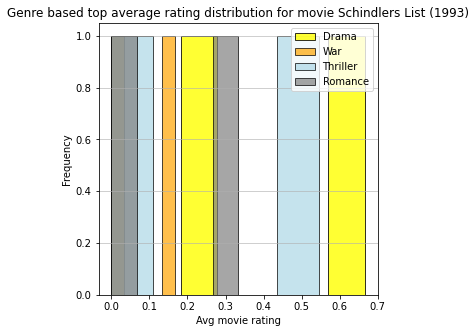

In [100]:
series1 = [genre_5_star_avg['Drama'],genre_4_star_avg['Drama']]
series2 = [genre_5_star_avg['War'],genre_4_star_avg['War']]
series3 = [genre_5_star_avg['Thriller'],genre_4_star_avg['Thriller']]
series4 = [genre_5_star_avg['Romance'],genre_4_star_avg['Romance']]

plt.hist(series1, bins=5,color='yellow', label='Drama', alpha=.8,edgecolor="black")
plt.hist(series2, bins=5, label='War', color='orange',alpha=.7,edgecolor="black")
plt.hist(series3, bins=5, label='Thriller', color='lightblue',alpha=.7,edgecolor="black")
plt.hist(series4, bins=5, label='Romance', color='grey',alpha=.7,edgecolor="black")

plt.title('Genre based top average rating distribution for movie Schindlers List (1993)')
plt.xlabel('Avg movie rating')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.legend()
  
# Showing the plot using plt.show()
plt.show()

                  Figure 1.4

## Summary

In this project,we retrieve the top-10 items with highest rating prediction for each user in the MovieLens-100k dataset. We first train an SVD algorithm on the whole dataset, and then predict all the ratings for the pairs (user, item) that are not in the training set. We then retrieve the top-10 prediction for each user.
And as Collaborative filtering leverages the power of the crowd. The intuition behind collaborative filtering is that if a user A likes movies X and Y, and if another user B likes movie X, there is a fair bit of chance that he will like the movie Y as well.
Suppose a huge number of users have assigned the same ratings to movies X and Y. A new user comes who has assigned the same rating to movie X but hasn't watched movie Y yet. Collaborative filtering system will recommend him the movie Y.


Justification of generated predition: 
    Initial approach is based on cummulative sum of top ratings(5&4 star) based on genre and Figure 1.1 and 1.2 depicts the top movie rating distribution of user(userId:511) across genre with user's interest in Thriller,action & Drama. The top recommendation generated by the model is for user(511) is Schindler's List (1993) which falls Drama,War genre as evident from Figure 1.3. There by implying a good recommendation covering user interest to some extent and also following a structure pattern of similar users who already watched the movie
    
   Post review modifications include the consideration of mean rating distribution for inference rather than sum of ratings. The same distribution is shown in Histogram i.e Figure 1.4 where X-axis depicts the Genre based top average rating distribution over multiple bins for top recommendation i.e movie Schindlers List (1993) over frequency.

### References:
https://surprise.readthedocs.io/en/stable/index.html

https://medium.com/analytics-vidhya/recommender-systems-explicit-feedback-implicit-feedback-and-hybrid-feedback-ddd1b2cdb3b

https://surprise.readthedocs.io/en/stable/matrix_factorization.html

https://surprise.readthedocs.io/en/stable/FAQ.html

https://analyticsindiamag.com/singular-value-decomposition-svd-application-recommender-system/

https://www.jiristodulka.com/post/recsys_cf/